
# Import Necessary Libraries


# Import libraries

In [1]:
import os 
print("hi")

hi


In [2]:
pip install seaborn


You should consider upgrading via the '/home/hifis/hifis0010/thesis/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [45]:
'''
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118
!pip install pandas matplotlib pillow torch torchvision scikit-learn tqdm seaborn
'''

'\n!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118\n!pip install pandas matplotlib pillow torch torchvision scikit-learn tqdm seaborn\n'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch.nn.functional as F
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
#from natsort import natsorted # type: ignore
from sklearn.model_selection import GroupShuffleSplit
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import DataLoader, WeightedRandomSampler
from torch.utils.data import WeightedRandomSampler
import seaborn as sns
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
import time
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.metrics import precision_score as skl_precision_score
from sklearn.metrics import recall_score as skl_recall_score
from sklearn.metrics import f1_score as skl_f1_score
from sklearn.metrics import accuracy_score as skl_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import random
import warnings
import shutil
# Save metrics dictionary (H) after training completes
import pickle
import os


# Import the code from all .py files

from custom_dataset import CustomMelanomaDataset  # Import the custom dataset
from resnet_model import ResNetModel
from preprocessing_csv import PreprocessingCSV
from train_test_loop import train_and_test
from lesion_predictions import LesionPredictions
from FocalLoss import FocalLoss
#from malignant_augmentation import TrainMalignantAugmentor, TestMalignantAugmentor


In [4]:
warnings.filterwarnings("ignore")


In [5]:
# Define the dynamic root path
BASE_DIR = "/home/hifis/hifis0010"

# Create the full path to the CSV file
csv_path = os.path.join(BASE_DIR, 'Thesis_Hafeez/Dataset/Train_JPEG/ISIC_2020_Training_GroundTruth.csv')

# Load the CSV file
df = pd.read_csv(csv_path)

# Display the first few rows of the dataset
print(df.head())

# Display the structure of the dataset
print(df.info())


     image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign     0.0  
1   unknown           benign     0.0  
2     nevus           benign     0.0  
3   unknown           benign     0.0  
4   unknown           benign     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null 

In [6]:
# Define the dynamic root path
BASE_DIR = "/home/hifis/hifis0010"

# Step 1: Define the universal path handling logic
SPLIT_CSV_DIR = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv')

# Universal Path Setup for Images
IMAGE_DIR = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'Train_JPEG', 'JPEG')

# Paths for Train/Test CSVs
TRAIN_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_split.csv')
TEST_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'test_split.csv')

# Create the full path to the CSV file
CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez/Dataset/Train_JPEG/ISIC_2020_Training_GroundTruth.csv')
preprocess_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez/Dataset/Train_JPEG/ISIC_2020_Training_GroundTruth_preprocess.csv')

# to overcome class imbalance
TRAIN_CSV_PASS1 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass1.csv')
TRAIN_CSV_PASS2 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass2.csv')

# save model after training/testing
MODEL_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez',  'Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results', 'output')

#save metrics dictionary
# Set a specific directory to save the file
Metrics_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez',  'Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results', 'output')

# save the plot PNG
PLOT_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez',  'Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results', 'output')


In [53]:
'''
# Step : Create an instance of PreprocessingCSV
preprocessor = PreprocessingCSV(csv_path, BASE_DIR)

# Step : Execute the preprocessing steps
preprocessor.analyze_raw_data()
preprocessor.check_for_anomalies()
preprocessor.clean_data()
preprocessor.save_clean_data()
preprocessor.split_by_patient_id()
preprocessor.verify_preprocessed_data()
'''


 
 Unique values in 'anatom_site_general_challenge': ['head/neck' 'upper extremity' 'lower extremity' 'torso' 'nan'
 'lower extremityi wrote to him' 'palms/soles' 'oral/genital']

 
 Rows with variations of 'unknown':
 Empty DataFrame
Columns: [image_name, patient_id, sex, age_approx, anatom_site_general_challenge, diagnosis, benign_malignant, target]
Index: []

 
 Unique values in 'anatom_site_general_challenge' after cleanup: ['head/neck' 'upper extremity' 'lower extremity' 'torso' 'unknown'
 'palms/soles' 'oral/genital']

 
 NaN values in each column:
 image_name                        0
patient_id                        0
sex                              65
age_approx                       68
anatom_site_general_challenge     0
diagnosis                         0
benign_malignant                  0
target                            1
dtype: int64


 Infinity values in each column:
 image_name                       0
patient_id                       0
sex                           

# Ratio of dataset. Analysis of Benign/Malignant in dataset

In [54]:
'''
def count_targets(csv_path):
    df = pd.read_csv(csv_path)
    benign_count = df[df['target'] == 0].shape[0]
    malignant_count = df[df['target'] == 1].shape[0]
    return benign_count, malignant_count

# Count targets in the training dataset
train_benign_count, train_malignant_count = count_targets(TRAIN_CSV_PATH)
print(f"Targets in training dataset:\nBenign (0.0): {train_benign_count}\nMalignant (1.0): {train_malignant_count}")

# Count targets in the test dataset
test_benign_count, test_malignant_count = count_targets(TEST_CSV_PATH)
print(f"\nTargets in test dataset:\nBenign (0.0): {test_benign_count}\nMalignant (1.0): {test_malignant_count}")

Targets in training dataset:
Benign (0.0): 23861
Malignant (1.0): 439

Targets in test dataset:
Benign (0.0): 8094
Malignant (1.0): 136


# Creating offline Augmentations for traing and test dataset to overcome class imbalance



# Ratio after Augmemntation of target Benign/Malignants in dataset

Here must run malignant_augmentation.py seperately.or run once here after all its purpose is served so never run


In [55]:
print(TRAIN_CSV_PATH)
print(IMAGE_DIR)
print(TEST_CSV_PATH)

/home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_split.csv
/home/hifis/hifis0010/Thesis_Hafeez/Dataset/Train_JPEG/JPEG
/home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/test_split.csv


In [56]:
'''

class TrainMalignantAugmentor:
    def __init__(self, train_aug_csv, image_dir, augmentations_per_image=15):
        self.train_aug_csv = train_aug_csv
        self.image_dir = image_dir
        self.augmentations_per_image = augmentations_per_image
        self.data = pd.read_csv(self.train_aug_csv)
        self.original_data_length = len(self.data)
        
        # Define the augmentation transformations
        self.augment_transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
            transforms.ToTensor()
        ])

    def augment_image(self, image_path, image_name_prefix):
        """
        Perform augmentations on a given image and return augmented images with new metadata entries.
        """
        try:
            original_image = Image.open(image_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            return []

        augmented_entries = []

        for i in range(1, self.augmentations_per_image + 1):
            augmented_image = self.augment_transform(original_image)
            # Save with .jpg extension
            augmented_image_name = f"{image_name_prefix}_aug_{i}.jpg"  # Add .jpg extension
            augmented_image_path = os.path.join(self.image_dir, augmented_image_name)

            # Save augmented image
            transforms.ToPILImage()(augmented_image).save(augmented_image_path, format='JPEG')

            # Create metadata entry for the augmented image with .jpg extension
            augmented_entries.append(augmented_image_name)  # Add .jpg extension in metadata

        return augmented_entries

    def perform_augmentation(self):
        augmented_metadata = []

        with tqdm(total=self.original_data_length, desc="Performing Image Augmentation", unit="image") as pbar:
            for idx in range(self.original_data_length):
                row = self.data.iloc[idx]
                image_name = row['image_name']
                benign_malignant = row['benign_malignant']

                # Skip already augmented images
                if "_aug_" in image_name:
                    pbar.update(1)
                    continue

                # Only augment malignant cases
                if benign_malignant == 'malignant':
                    image_path = os.path.join(self.image_dir, image_name)

                    # Check if the file exists
                    if not os.path.exists(image_path):
                        print(f"Image not found: {image_path}")
                        pbar.update(1)
                        continue

                    augmented_image_names = self.augment_image(image_path, image_name)

                    # Append metadata for augmented images
                    for aug_image_name in augmented_image_names:
                        augmented_row = row.copy()
                        augmented_row['image_name'] = aug_image_name  # Include .jpg extension
                        augmented_metadata.append(augmented_row)

                pbar.update(1)

        # Append augmented metadata to the original DataFrame
        augmented_metadata_df = pd.DataFrame(augmented_metadata)
        self.data = pd.concat([self.data, augmented_metadata_df], ignore_index=True)

        print("Image augmentations for training dataset is complete.")

    def save_updated_metadata(self):
        """Save the updated metadata to the original CSV file."""
        self.data.to_csv(self.train_aug_csv, index=False)
        print(f"Updated metadata saved to {self.train_aug_csv}")
        print("Process finished successfully.")


class TestMalignantAugmentor:
    def __init__(self, test_aug_csv, image_dir, augmentations_per_image=10):
        self.test_aug_csv = test_aug_csv
        self.image_dir = image_dir
        self.augmentations_per_image = augmentations_per_image
        self.data = pd.read_csv(self.test_aug_csv)
        self.original_data_length = len(self.data)
        
        # Define the augmentation transformations
        self.augment_transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
            transforms.ToTensor()
        ])

    def augment_image(self, image_path, image_name_prefix):
        """
        Perform augmentations on a given image and return augmented images with new metadata entries.
        """
        try:
            original_image = Image.open(image_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            return []

        augmented_entries = []

        for i in range(1, self.augmentations_per_image + 1):
            augmented_image = self.augment_transform(original_image)
            # Save with .jpg extension
            augmented_image_name = f"{image_name_prefix}_aug_{i}.jpg"  # Add .jpg extension
            augmented_image_path = os.path.join(self.image_dir, augmented_image_name)

            # Save augmented image
            transforms.ToPILImage()(augmented_image).save(augmented_image_path, format='JPEG')

            # Create metadata entry for the augmented image with .jpg extension
            augmented_entries.append(augmented_image_name)  # Add .jpg extension in metadata

        return augmented_entries

    def perform_augmentation(self):
        augmented_metadata = []

        with tqdm(total=self.original_data_length, desc="Performing Image Augmentation (Test)", unit="image") as pbar:
            for idx in range(self.original_data_length):
                row = self.data.iloc[idx]
                image_name = row['image_name']
                benign_malignant = row['benign_malignant']

                # Skip already augmented images
                if "_aug_" in image_name:
                    pbar.update(1)
                    continue

                # Only augment malignant cases
                if benign_malignant == 'malignant':
                    image_path = os.path.join(self.image_dir, image_name)

                    # Check if the file exists
                    if not os.path.exists(image_path):
                        print(f"Image not found: {image_path}")
                        pbar.update(1)
                        continue

                    augmented_image_names = self.augment_image(image_path, image_name)

                    # Append metadata for augmented images
                    for aug_image_name in augmented_image_names:
                        augmented_row = row.copy()
                        augmented_row['image_name'] = aug_image_name  # Include .jpg extension
                        augmented_metadata.append(augmented_row)

                pbar.update(1)

        # Append augmented metadata to the original DataFrame
        augmented_metadata_df = pd.DataFrame(augmented_metadata)
        self.data = pd.concat([self.data, augmented_metadata_df], ignore_index=True)

        print("Image augmentations for test dataset is complete.")

    def save_updated_metadata(self):
        """Save the updated metadata to the original CSV file."""
        self.data.to_csv(self.test_aug_csv, index=False)
        print(f"Updated metadata saved to {self.test_aug_csv}")
        print("Process finished successfully.")
'''

In [57]:
'''
# Initialize the augmentor for training data
train_augmentor = TrainMalignantAugmentor(
        train_aug_csv=TRAIN_CSV_PATH,
        image_dir=IMAGE_DIR)

# Perform augmentation and save the updated metadata for training
train_augmentor.perform_augmentation()
train_augmentor.save_updated_metadata()
'''

Performing Image Augmentation: 100%|██████████| 24300/24300 [1:24:55<00:00,  4.77image/s]  


Image augmentations for training dataset is complete.
Updated metadata saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_split.csv
Process finished successfully.


In [58]:
'''
# Initialize the augmentor for test data
test_augmentor = TestMalignantAugmentor(
        test_aug_csv=TEST_CSV_PATH,
        image_dir=IMAGE_DIR)

# Perform augmentation and save the updated metadata for testing
test_augmentor.perform_augmentation()
test_augmentor.save_updated_metadata()
'''

Performing Image Augmentation (Test): 100%|██████████| 8230/8230 [17:36<00:00,  7.79image/s]


Image augmentations for test dataset is complete.
Updated metadata saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/test_split.csv
Process finished successfully.


# Ratio after Augmemntation of target Benign/Malignants in dataset

In [7]:
TRAIN_CSV_PASS1 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass1.csv')
TRAIN_CSV_PASS2 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass2.csv')

In [8]:

def count_targets(csv_path):
    df = pd.read_csv(csv_path)
    benign_count = df[df['target'] == 0].shape[0]
    malignant_count = df[df['target'] == 1].shape[0]
    return benign_count, malignant_count

# Count targets in the training dataset
train_benign_count, train_malignant_count = count_targets(TRAIN_CSV_PATH)
print(f"Targets in training dataset:\nBenign (0.0): {train_benign_count}\nMalignant (1.0): {train_malignant_count}")

# Count targets in the test dataset
test_benign_count, test_malignant_count = count_targets(TEST_CSV_PATH)
print(f"\nTargets in test dataset:\nBenign (0.0): {test_benign_count}\nMalignant (1.0): {test_malignant_count}")


Targets in training dataset:
Benign (0.0): 23861
Malignant (1.0): 7024

Targets in test dataset:
Benign (0.0): 8094
Malignant (1.0): 1496


# 24k benign trained in 2 stages, 2 * (12k benign + 7K malignant) 

# Split the Benign into 2 phase trainnig.

In [61]:
'''
import random
import os
import pandas as pd

# Load the dataset
data = pd.read_csv(TRAIN_CSV_PATH)

# Verify the labels in the dataset
print("Unique values in 'benign_malignant' column:", data['benign_malignant'].unique())

# Group by patient_id
grouped = data.groupby('patient_id')

# Separate benign and malignant cases
benign_data = data[data['benign_malignant'] == 'benign']
malignant_data = data[data['benign_malignant'] == 'malignant']

# Check the number of benign and malignant samples before proceeding
print(f"Total benign cases: {len(benign_data)}")
print(f"Total malignant cases: {len(malignant_data)}")

if len(malignant_data) < 7024:
    print("Warning: Malignant data count is less than expected. Please check the data source or filtering logic.")

# Shuffle benign patient groups and split approximately in half
benign_patient_ids = list(benign_data['patient_id'].unique())
random.shuffle(benign_patient_ids)
split_index = len(benign_patient_ids) // 2

# Split benign data into two halves based on patient IDs
benign_pass1 = benign_data[benign_data['patient_id'].isin(benign_patient_ids[:split_index])]
benign_pass2 = benign_data[benign_data['patient_id'].isin(benign_patient_ids[split_index:])]

# Add all malignant cases to both pass1 and pass2
train_pass1 = pd.concat([benign_pass1, malignant_data], ignore_index=True)
train_pass2 = pd.concat([benign_pass2, malignant_data], ignore_index=True)

# Ensure the output directory exists
if not os.path.exists(os.path.dirname(TRAIN_CSV_PASS1)):
    os.makedirs(os.path.dirname(TRAIN_CSV_PASS1))

# Save the passes to their respective CSV files
train_pass1.to_csv(TRAIN_CSV_PASS1, index=False)
train_pass2.to_csv(TRAIN_CSV_PASS2, index=False)

print(f"Pass 1 saved to {TRAIN_CSV_PASS1}")
print(f"Pass 2 saved to {TRAIN_CSV_PASS2}")

'''

Unique values in 'benign_malignant' column: ['benign' 'malignant']
Total benign cases: 23861
Total malignant cases: 7024
Pass 1 saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_pass1.csv
Pass 2 saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_pass2.csv


In [62]:

# Count and print the number of benign and malignant cases in each training pass
def count_cases(csv_path):
    data = pd.read_csv(csv_path)
    benign_count = len(data[data['benign_malignant'] == 'benign'])
    malignant_count = len(data[data['benign_malignant'] == 'malignant'])
    return benign_count, malignant_count

benign_count_pass1, malignant_count_pass1 = count_cases(TRAIN_CSV_PASS1)
benign_count_pass2, malignant_count_pass2 = count_cases(TRAIN_CSV_PASS2)

print(f"\nPass 1 - Benign: {benign_count_pass1}, Malignant: {malignant_count_pass1}")
print(f"Pass 2 - Benign: {benign_count_pass2}, Malignant: {malignant_count_pass2}")



Pass 1 - Benign: 12527, Malignant: 7024
Pass 2 - Benign: 11334, Malignant: 7024


# Define Transformations

In [9]:
# Training Transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a consistent size
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),  # Random vertical flip
    transforms.RandomRotation(30),  # Random rotation for variety
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),  # Color jitter for diversity
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Testing Transformations
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a consistent size
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])


# Define train and test datasets


In [10]:
# Initialize datasets for Pass 1 and Pass 2
train_pass1_dataset = CustomMelanomaDataset(
    csv_file=TRAIN_CSV_PASS1,  # CSV for Pass 1 with 12k benign + all malignant
    image_dir=IMAGE_DIR,
    transform=train_transforms,
    is_test=False
)

train_pass2_dataset = CustomMelanomaDataset(
    csv_file=TRAIN_CSV_PASS2,  # CSV for Pass 2 with the remaining 12k benign + all malignant
    image_dir=IMAGE_DIR,
    transform=train_transforms,
    is_test=False
)

test_dataset = CustomMelanomaDataset(
    csv_file=TEST_CSV_PATH,  # Test CSV with augmented malignant and original benign samples
    image_dir=IMAGE_DIR,
    transform=test_transforms,
    is_test=True
)


# configs

In [11]:
# Learning parameters
lr = 1e-5  # Keep the learning rate the same initially. adjust it based on training performance
NUM_EPOCHS = 15  # Increase to 20 for better convergence given more computational resources
BATCH_SIZE = 128  # Increase batch size to 64/128 to fully utilize the GPU memory
num_workers = 16  # Increase num_workers to 16 to leverage my 32 CPUs and speed up data loading

# Determine if CUDA is available
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
PIN_MEMORY = True if torch.cuda.is_available() else False

print(f"[INFO] Using device: {DEVICE}")


[INFO] Using device: cuda


In [12]:
# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}\n")

    # Loop through each GPU and print details
    for i in range(num_gpus):
        print(f"\nGPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"  - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**2:.2f} MB")
        print(f"  - Memory Cached: {torch.cuda.memory_reserved(i)/1024**2:.2f} MB")
else:
    print("No GPU available.")


Number of GPUs available: 2


GPU 0: NVIDIA A100-SXM4-40GB
  - Memory Allocated: 0.00 MB
  - Memory Cached: 0.00 MB

GPU 1: NVIDIA A100-SXM4-40GB
  - Memory Allocated: 0.00 MB
  - Memory Cached: 0.00 MB


# Define dataloaders, lossFunc, Optim

In [13]:
# Compute weights for Pass 1 dataset
malignant_count_pass1 = len(train_pass1_dataset.metadata[train_pass1_dataset.metadata['benign_malignant'] == 'malignant'])
benign_count_pass1 = len(train_pass1_dataset.metadata[train_pass1_dataset.metadata['benign_malignant'] == 'benign'])
total_count_pass1 = len(train_pass1_dataset)

# Set weights: higher for minority class (for Pass 1)
weights_pass1 = [
    benign_count_pass1 / total_count_pass1 if label == 0 else malignant_count_pass1 / total_count_pass1
    for label in train_pass1_dataset.metadata['target']
]
sampler_pass1 = WeightedRandomSampler(weights_pass1, len(weights_pass1))


In [14]:
# Compute weights for Pass 2 dataset
malignant_count_pass2 = len(train_pass2_dataset.metadata[train_pass2_dataset.metadata['benign_malignant'] == 'malignant'])
benign_count_pass2 = len(train_pass2_dataset.metadata[train_pass2_dataset.metadata['benign_malignant'] == 'benign'])
total_count_pass2 = len(train_pass2_dataset)

# Set weights: higher for minority class (for Pass 2)
weights_pass2 = [
    benign_count_pass2 / total_count_pass2 if label == 0 else malignant_count_pass2 / total_count_pass2
    for label in train_pass2_dataset.metadata['target']
]
sampler_pass2 = WeightedRandomSampler(weights_pass2, len(weights_pass2))


In [15]:

# Create DataLoaders for Pass 1, Pass 2, and Test dataset
# Create DataLoaders with weighted sampler for Pass 1 and Pass 2
train_pass1_loader = DataLoader(
    dataset=train_pass1_dataset,
    batch_size=BATCH_SIZE,
    sampler=sampler_pass1,  # Use weighted random sampler for class balancing
    num_workers=num_workers,
    pin_memory=PIN_MEMORY
)

train_pass2_loader = DataLoader(
    dataset=train_pass2_dataset,
    batch_size=BATCH_SIZE,
    sampler=sampler_pass2,  # Use weighted random sampler for class balancing
    num_workers=num_workers,
    pin_memory=PIN_MEMORY
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,  # No need to shuffle test data
    num_workers=num_workers,
    pin_memory=PIN_MEMORY
)

print("DataLoaders created successfully.")

DataLoaders created successfully.


In [16]:
# Calculate steps per epoch
trainSteps1 = len(train_pass1_loader)
trainSteps2 = len(train_pass2_loader)

testSteps = len(test_loader)

print(f"[INFO] Training steps for Pass 1 per epoch: {trainSteps1}")
print(f"[INFO] Training steps for Pass 2 per epoch: {trainSteps2}")
print(f"[INFO] Testing steps per epoch: {testSteps}")


[INFO] Training steps for Pass 1 per epoch: 144
[INFO] Training steps for Pass 2 per epoch: 144
[INFO] Testing steps per epoch: 75


 # Initialize Model, Loss Function, and Optimizer

In [17]:
# Define the model, where we pass the number of metadata features (3 in this case)
num_metadata_features = 3  # Number of metadata features: sex, age, and site
model = ResNetModel(num_metadata_features).to(DEVICE)

# Loss function and optimizer #old lossFunc
#lossFunc = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
lossFunc = FocalLoss(alpha=3, gamma=2)  # Adjust alpha to give more weight to malignant class

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#old scheduler
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Learning rate scheduler
# Add a learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

In [94]:
print(model)

ResNetModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
       

# Initialize Training History Dictionary

#  Training Loop Implementation with Metric Tracking and Validation

In [18]:
# Train on Pass 1 Dataset
print("Starting training with Pass 1 Dataset")
H_pass1 = train_and_test(
    model=model,
    train_loader=train_pass1_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    scheduler=scheduler,
    lossFunc=lossFunc,
    DEVICE=DEVICE,
    NUM_EPOCHS=NUM_EPOCHS,
    Metrics_PATH=Metrics_PATH
)
# After training, we can use H for further analysis or plotting


Starting training with Pass 1 Dataset

Epoch 1/15 running...


Testing: 100%|██████████| 75/75 [02:25<00:00,  1.94s/batch]


[INFO] EPOCH: 1/15
Train loss: 0.231059
Train Accuracy: 0.878854
Train Precision: 0.789138
Train Recall: 0.761867
Train F1 Score: 0.775263
Train ROC AUC: 0.937090
Test loss: 0.123145
Test Accuracy: 0.956204
Test Precision: 0.926109
Test Recall: 0.825535
Test F1 Score: 0.872934
Test ROC AUC: 0.972347
Test Average Precision Score: 0.927205


Epoch 2/15 running...


Testing: 100%|██████████| 75/75 [02:16<00:00,  1.82s/batch]


[INFO] EPOCH: 2/15
Train loss: 0.093303
Train Accuracy: 0.961706
Train Precision: 0.963770
Train Recall: 0.896726
Train F1 Score: 0.929040
Train ROC AUC: 0.985715
Test loss: 0.078427
Test Accuracy: 0.973514
Test Precision: 0.989801
Test Recall: 0.844251
Test F1 Score: 0.911251
Test ROC AUC: 0.981118
Test Average Precision Score: 0.952398


Epoch 3/15 running...


Testing: 100%|██████████| 75/75 [02:15<00:00,  1.81s/batch]


[INFO] EPOCH: 3/15
Train loss: 0.082976
Train Accuracy: 0.966445
Train Precision: 0.972493
Train Recall: 0.901788
Train F1 Score: 0.935807
Train ROC AUC: 0.987222
Test loss: 0.081738
Test Accuracy: 0.972263
Test Precision: 0.985926
Test Recall: 0.841578
Test F1 Score: 0.908051
Test ROC AUC: 0.980422
Test Average Precision Score: 0.950824


Epoch 4/15 running...


Testing: 100%|██████████| 75/75 [02:16<00:00,  1.82s/batch]


[INFO] EPOCH: 4/15
Train loss: 0.075684
Train Accuracy: 0.969822
Train Precision: 0.973717
Train Recall: 0.916013
Train F1 Score: 0.943984
Train ROC AUC: 0.989403
Test loss: 0.078261
Test Accuracy: 0.973306
Test Precision: 0.993129
Test Recall: 0.838235
Test F1 Score: 0.909132
Test ROC AUC: 0.980864
Test Average Precision Score: 0.952611


Epoch 5/15 running...


Testing: 100%|██████████| 75/75 [02:18<00:00,  1.84s/batch]


[INFO] EPOCH: 5/15
Train loss: 0.073435
Train Accuracy: 0.970258
Train Precision: 0.977735
Train Recall: 0.912708
Train F1 Score: 0.944103
Train ROC AUC: 0.990081
Test loss: 0.072278
Test Accuracy: 0.976434
Test Precision: 0.990483
Test Recall: 0.862299
Test F1 Score: 0.921957
Test ROC AUC: 0.983496
Test Average Precision Score: 0.959752


Epoch 6/15 running...


Testing: 100%|██████████| 75/75 [02:16<00:00,  1.82s/batch]


[INFO] EPOCH: 6/15
Train loss: 0.064046
Train Accuracy: 0.972927
Train Precision: 0.975868
Train Recall: 0.923293
Train F1 Score: 0.948853
Train ROC AUC: 0.992441
Test loss: 0.074460
Test Accuracy: 0.974974
Test Precision: 0.990380
Test Recall: 0.852941
Test F1 Score: 0.916537
Test ROC AUC: 0.984003
Test Average Precision Score: 0.958423


Epoch 7/15 running...


Testing: 100%|██████████| 75/75 [02:16<00:00,  1.81s/batch]


[INFO] EPOCH: 7/15
Train loss: 0.061363
Train Accuracy: 0.974344
Train Precision: 0.980813
Train Recall: 0.925423
Train F1 Score: 0.952313
Train ROC AUC: 0.993339
Test loss: 0.076978
Test Accuracy: 0.975182
Test Precision: 0.990864
Test Recall: 0.853610
Test F1 Score: 0.917130
Test ROC AUC: 0.983303
Test Average Precision Score: 0.958240


Epoch 8/15 running...


Testing: 100%|██████████| 75/75 [02:09<00:00,  1.73s/batch]


[INFO] EPOCH: 8/15
Train loss: 0.058176
Train Accuracy: 0.975651
Train Precision: 0.979210
Train Recall: 0.931382
Train F1 Score: 0.954697
Train ROC AUC: 0.993793
Test loss: 0.082513
Test Accuracy: 0.974974
Test Precision: 0.992739
Test Recall: 0.849599
Test F1 Score: 0.915608
Test ROC AUC: 0.981695
Test Average Precision Score: 0.956896


Epoch 9/15 running...


Testing: 100%|██████████| 75/75 [02:03<00:00,  1.65s/batch]


[INFO] EPOCH: 9/15
Train loss: 0.056054
Train Accuracy: 0.976250
Train Precision: 0.980750
Train Recall: 0.933346
Train F1 Score: 0.956461
Train ROC AUC: 0.994616
Test loss: 0.069558
Test Accuracy: 0.974974
Test Precision: 0.970409
Test Recall: 0.883021
Test F1 Score: 0.924655
Test ROC AUC: 0.984450
Test Average Precision Score: 0.960983


Epoch 10/15 running...


Testing: 100%|██████████| 75/75 [01:44<00:00,  1.40s/batch]


[INFO] EPOCH: 10/15
Train loss: 0.054825
Train Accuracy: 0.975488
Train Precision: 0.977993
Train Recall: 0.932719
Train F1 Score: 0.954819
Train ROC AUC: 0.994891
Test loss: 0.092203
Test Accuracy: 0.973827
Test Precision: 0.988884
Test Recall: 0.847594
Test F1 Score: 0.912804
Test ROC AUC: 0.982290
Test Average Precision Score: 0.955476


Epoch 11/15 running...


Testing: 100%|██████████| 75/75 [01:50<00:00,  1.47s/batch]


[INFO] EPOCH: 11/15
Train loss: 0.050794
Train Accuracy: 0.977503
Train Precision: 0.978980
Train Recall: 0.939299
Train F1 Score: 0.958729
Train ROC AUC: 0.995772
Test loss: 0.086692
Test Accuracy: 0.974453
Test Precision: 0.988004
Test Recall: 0.852941
Test F1 Score: 0.915518
Test ROC AUC: 0.982112
Test Average Precision Score: 0.956295


Epoch 12/15 running...


Testing: 100%|██████████| 75/75 [01:51<00:00,  1.49s/batch]


[INFO] EPOCH: 12/15
Train loss: 0.049511
Train Accuracy: 0.978865
Train Precision: 0.982664
Train Recall: 0.943268
Train F1 Score: 0.962563
Train ROC AUC: 0.995823
Test loss: 0.089059
Test Accuracy: 0.974035
Test Precision: 0.982908
Test Recall: 0.857620
Test F1 Score: 0.916000
Test ROC AUC: 0.981878
Test Average Precision Score: 0.954901


Epoch 13/15 running...


Testing: 100%|██████████| 75/75 [01:52<00:00,  1.51s/batch]


[INFO] EPOCH: 13/15
Train loss: 0.043335
Train Accuracy: 0.981425
Train Precision: 0.982150
Train Recall: 0.949613
Train F1 Score: 0.965608
Train ROC AUC: 0.996823
Test loss: 0.094329
Test Accuracy: 0.969969
Test Precision: 0.971072
Test Recall: 0.848262
Test F1 Score: 0.905522
Test ROC AUC: 0.980688
Test Average Precision Score: 0.951569


Epoch 14/15 running...


Testing: 100%|██████████| 75/75 [01:53<00:00,  1.51s/batch]


[INFO] EPOCH: 14/15
Train loss: 0.044991
Train Accuracy: 0.979464
Train Precision: 0.977465
Train Recall: 0.948272
Train F1 Score: 0.962647
Train ROC AUC: 0.996768
Test loss: 0.096877
Test Accuracy: 0.973097
Test Precision: 0.983247
Test Recall: 0.850936
Test F1 Score: 0.912319
Test ROC AUC: 0.980502
Test Average Precision Score: 0.953333


Epoch 15/15 running...


Testing: 100%|██████████| 75/75 [01:37<00:00,  1.31s/batch]


[INFO] EPOCH: 15/15
Train loss: 0.037133
Train Accuracy: 0.984857
Train Precision: 0.986179
Train Recall: 0.958514
Train F1 Score: 0.972150
Train ROC AUC: 0.997642
Test loss: 0.095401
Test Accuracy: 0.974557
Test Precision: 0.988944
Test Recall: 0.852273
Test F1 Score: 0.915536
Test ROC AUC: 0.981349
Test Average Precision Score: 0.953422

[INFO] Total time taken to train the model: 4651.0 seconds


# Saving the metrics for Pass 1 in H

In [19]:
import os
import pickle

# Define the path where you want to save the metrics
BASE_DIR = "/home/hifis/hifis0010"
# Update this with your actual base directory
Metrics_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'output')

# Create the directory if it doesn't exist
if not os.path.exists(Metrics_PATH):
    os.makedirs(Metrics_PATH)

# Save the metrics dictionary (H_pass1) after training completes
metrics_path = os.path.join(Metrics_PATH, 'metrics_pass1.pkl')  # Saving it as metrics_pass1.pkl for clarity
with open(metrics_path, 'wb') as f:
    pickle.dump(H_pass1, f)  # Make sure to save the correct variable H_pass1

print(f"Metrics of Pass 1 are saved to {metrics_path}")



Metrics of Pass 1 are saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/metrics_pass1.pkl


In [20]:
# Train on Pass 2 Dataset
print("Starting training with Pass 2 Dataset")
H_pass2 = train_and_test(
    model=model,
    train_loader=train_pass2_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    scheduler=scheduler,
    lossFunc=lossFunc,
    DEVICE=DEVICE,
    NUM_EPOCHS=NUM_EPOCHS,
    Metrics_PATH=Metrics_PATH
)


Starting training with Pass 2 Dataset

Epoch 1/15 running...


Testing: 100%|██████████| 75/75 [01:40<00:00,  1.34s/batch]


[INFO] EPOCH: 1/15
Train loss: 0.040257
Train Accuracy: 0.982133
Train Precision: 0.980594
Train Recall: 0.954358
Train F1 Score: 0.967298
Train ROC AUC: 0.997352
Test loss: 0.091018
Test Accuracy: 0.967570
Test Precision: 0.939653
Test Recall: 0.883690
Test F1 Score: 0.910812
Test ROC AUC: 0.979529
Test Average Precision Score: 0.949519


Epoch 2/15 running...


Testing: 100%|██████████| 75/75 [01:40<00:00,  1.35s/batch]


[INFO] EPOCH: 2/15
Train loss: 0.042698
Train Accuracy: 0.981207
Train Precision: 0.980569
Train Recall: 0.950436
Train F1 Score: 0.965267
Train ROC AUC: 0.996973
Test loss: 0.106965
Test Accuracy: 0.972054
Test Precision: 0.989688
Test Recall: 0.834893
Test F1 Score: 0.905724
Test ROC AUC: 0.982034
Test Average Precision Score: 0.953805


Epoch 3/15 running...


Testing: 100%|██████████| 75/75 [01:43<00:00,  1.38s/batch]


[INFO] EPOCH: 3/15
Train loss: 0.033989
Train Accuracy: 0.985184
Train Precision: 0.985146
Train Recall: 0.961903
Train F1 Score: 0.973386
Train ROC AUC: 0.998248
Test loss: 0.113892
Test Accuracy: 0.970177
Test Precision: 0.973762
Test Recall: 0.845588
Test F1 Score: 0.905160
Test ROC AUC: 0.978376
Test Average Precision Score: 0.948439


Epoch 4/15 running...


Testing: 100%|██████████| 75/75 [01:49<00:00,  1.46s/batch]


[INFO] EPOCH: 4/15
Train loss: 0.034246
Train Accuracy: 0.984639
Train Precision: 0.980643
Train Recall: 0.963718
Train F1 Score: 0.972107
Train ROC AUC: 0.998125
Test loss: 0.099408
Test Accuracy: 0.975182
Test Precision: 0.986228
Test Recall: 0.860294
Test F1 Score: 0.918967
Test ROC AUC: 0.982794
Test Average Precision Score: 0.956499


Epoch 5/15 running...


Testing: 100%|██████████| 75/75 [01:51<00:00,  1.48s/batch]


[INFO] EPOCH: 5/15
Train loss: 0.032345
Train Accuracy: 0.985293
Train Precision: 0.983868
Train Recall: 0.964374
Train F1 Score: 0.974023
Train ROC AUC: 0.998469
Test loss: 0.115613
Test Accuracy: 0.970490
Test Precision: 0.977405
Test Recall: 0.842246
Test F1 Score: 0.904806
Test ROC AUC: 0.979321
Test Average Precision Score: 0.949133


Epoch 6/15 running...


Testing: 100%|██████████| 75/75 [01:50<00:00,  1.47s/batch]


[INFO] EPOCH: 6/15
Train loss: 0.030897
Train Accuracy: 0.986327
Train Precision: 0.986686
Train Recall: 0.962822
Train F1 Score: 0.974608
Train ROC AUC: 0.998480
Test loss: 0.119004
Test Accuracy: 0.968196
Test Precision: 0.971580
Test Recall: 0.835561
Test F1 Score: 0.898452
Test ROC AUC: 0.977740
Test Average Precision Score: 0.945128


Epoch 7/15 running...


Testing: 100%|██████████| 75/75 [01:46<00:00,  1.42s/batch]


[INFO] EPOCH: 7/15
Train loss: 0.029141
Train Accuracy: 0.986600
Train Precision: 0.983261
Train Recall: 0.968762
Train F1 Score: 0.975958
Train ROC AUC: 0.998737
Test loss: 0.118121
Test Accuracy: 0.970594
Test Precision: 0.980156
Test Recall: 0.838904
Test F1 Score: 0.904046
Test ROC AUC: 0.976700
Test Average Precision Score: 0.947751


Epoch 8/15 running...


Testing: 100%|██████████| 75/75 [01:44<00:00,  1.40s/batch]


[INFO] EPOCH: 8/15
Train loss: 0.030056
Train Accuracy: 0.986001
Train Precision: 0.983330
Train Recall: 0.965680
Train F1 Score: 0.974425
Train ROC AUC: 0.998450
Test loss: 0.122750
Test Accuracy: 0.969030
Test Precision: 0.976701
Test Recall: 0.833556
Test F1 Score: 0.899469
Test ROC AUC: 0.975622
Test Average Precision Score: 0.943864


Epoch 9/15 running...


Testing: 100%|██████████| 75/75 [01:44<00:00,  1.39s/batch]


[INFO] EPOCH: 9/15
Train loss: 0.025763
Train Accuracy: 0.988888
Train Precision: 0.988247
Train Recall: 0.972249
Train F1 Score: 0.980183
Train ROC AUC: 0.999018
Test loss: 0.122454
Test Accuracy: 0.966736
Test Precision: 0.962055
Test Recall: 0.840241
Test F1 Score: 0.897031
Test ROC AUC: 0.976530
Test Average Precision Score: 0.944321


Epoch 10/15 running...


Testing: 100%|██████████| 75/75 [01:49<00:00,  1.46s/batch]


[INFO] EPOCH: 10/15
Train loss: 0.024596
Train Accuracy: 0.989269
Train Precision: 0.986743
Train Recall: 0.974594
Train F1 Score: 0.980631
Train ROC AUC: 0.999162
Test loss: 0.107873
Test Accuracy: 0.968300
Test Precision: 0.949462
Test Recall: 0.871658
Test F1 Score: 0.908898
Test ROC AUC: 0.978553
Test Average Precision Score: 0.950624


Epoch 11/15 running...


Testing: 100%|██████████| 75/75 [01:53<00:00,  1.51s/batch]


[INFO] EPOCH: 11/15
Train loss: 0.022798
Train Accuracy: 0.990522
Train Precision: 0.989046
Train Recall: 0.976598
Train F1 Score: 0.982783
Train ROC AUC: 0.999246
Test loss: 0.130710
Test Accuracy: 0.965381
Test Precision: 0.953262
Test Recall: 0.844920
Test F1 Score: 0.895827
Test ROC AUC: 0.972616
Test Average Precision Score: 0.939917


Epoch 12/15 running...


Testing: 100%|██████████| 75/75 [01:49<00:00,  1.46s/batch]


[INFO] EPOCH: 12/15
Train loss: 0.023733
Train Accuracy: 0.989868
Train Precision: 0.988036
Train Recall: 0.975202
Train F1 Score: 0.981577
Train ROC AUC: 0.999079
Test loss: 0.128485
Test Accuracy: 0.968196
Test Precision: 0.971135
Test Recall: 0.836230
Test F1 Score: 0.898648
Test ROC AUC: 0.974821
Test Average Precision Score: 0.942864


Epoch 13/15 running...


Testing: 100%|██████████| 75/75 [01:47<00:00,  1.44s/batch]


[INFO] EPOCH: 13/15
Train loss: 0.020066
Train Accuracy: 0.991666
Train Precision: 0.990059
Train Recall: 0.979133
Train F1 Score: 0.984566
Train ROC AUC: 0.999275
Test loss: 0.132093
Test Accuracy: 0.967570
Test Precision: 0.965286
Test Recall: 0.840909
Test F1 Score: 0.898815
Test ROC AUC: 0.973869
Test Average Precision Score: 0.940593


Epoch 14/15 running...


Testing: 100%|██████████| 75/75 [01:53<00:00,  1.51s/batch]


[INFO] EPOCH: 14/15
Train loss: 0.021563
Train Accuracy: 0.989759
Train Precision: 0.986356
Train Recall: 0.976699
Train F1 Score: 0.981503
Train ROC AUC: 0.999360
Test loss: 0.141613
Test Accuracy: 0.966945
Test Precision: 0.966433
Test Recall: 0.834893
Test F1 Score: 0.895860
Test ROC AUC: 0.973098
Test Average Precision Score: 0.937511


Epoch 15/15 running...


Testing: 100%|██████████| 75/75 [01:42<00:00,  1.37s/batch]

[INFO] EPOCH: 15/15
Train loss: 0.020598
Train Accuracy: 0.990903
Train Precision: 0.988468
Train Recall: 0.979090
Train F1 Score: 0.983756
Train ROC AUC: 0.999384
Test loss: 0.130636
Test Accuracy: 0.965276
Test Precision: 0.951593
Test Recall: 0.846925
Test F1 Score: 0.896213
Test ROC AUC: 0.973548
Test Average Precision Score: 0.940848

[INFO] Total time taken to train the model: 4259.0 seconds


# Saving the metrics for Pass 2 in H

In [21]:
import os
import pickle

# Define the path where you want to save the metrics
BASE_DIR = "/home/hifis/hifis0010"
# Update this with your actual base directory
Metrics_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'output')

# Create the directory if it doesn't exist
if not os.path.exists(Metrics_PATH):
    os.makedirs(Metrics_PATH)

# Save the metrics dictionary (H_pass1) after training completes
metrics_path = os.path.join(Metrics_PATH, 'metrics_pass2.pkl')  # Saving it as metrics_pass1.pkl for clarity
with open(metrics_path, 'wb') as f:
    pickle.dump(H_pass2, f)  # Make sure to save the correct variable H_pass1

print(f"Metrics of Pass 1 are saved to {metrics_path}")



Metrics of Pass 1 are saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/metrics_pass2.pkl


# saving trained model

In [22]:
# After the training loop ends, save the model
# Ensure the directory exists, if not, create it
if not os.path.exists(MODEL_PATH):
    os.makedirs(MODEL_PATH)

# Define the model filename with the .pth extension
model_filename = "melanoma_trained_model.pth"

# Full path to save the model
model_save_path = os.path.join(MODEL_PATH, model_filename)

# Save the model, replacing if it already exists
if os.path.exists(model_save_path):
    os.remove(model_save_path)

torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/melanoma_trained_model.pth


# loading the metrics .pkl file

In [25]:
'''
# Define the path where metrics.pkl for Pass 1 is saved
metrics_file_pass1 = os.path.join(Metrics_PATH, 'metrics_pass1.pkl')

# Load the metrics dictionary for Pass 1
with open(metrics_file_pass1, 'rb') as f:
    H_pass1 = pickle.load(f)

# Define the path where metrics_pass2.pkl for Pass 2 is saved
metrics_file_pass2 = os.path.join(Metrics_PATH, 'metrics_pass2.pkl')

# Load the metrics dictionary for Pass 2
with open(metrics_file_pass2, 'rb') as f:
    H_pass2 = pickle.load(f)

# Plot the combined metrics
plot_combined_metrics(H_pass1, H_pass2)
'''


FileNotFoundError: [Errno 2] No such file or directory: '/home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/metrics_pass2.pkl'

# Plot the Training Metrics 

Plot saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/model_metrics_plot.jpeg


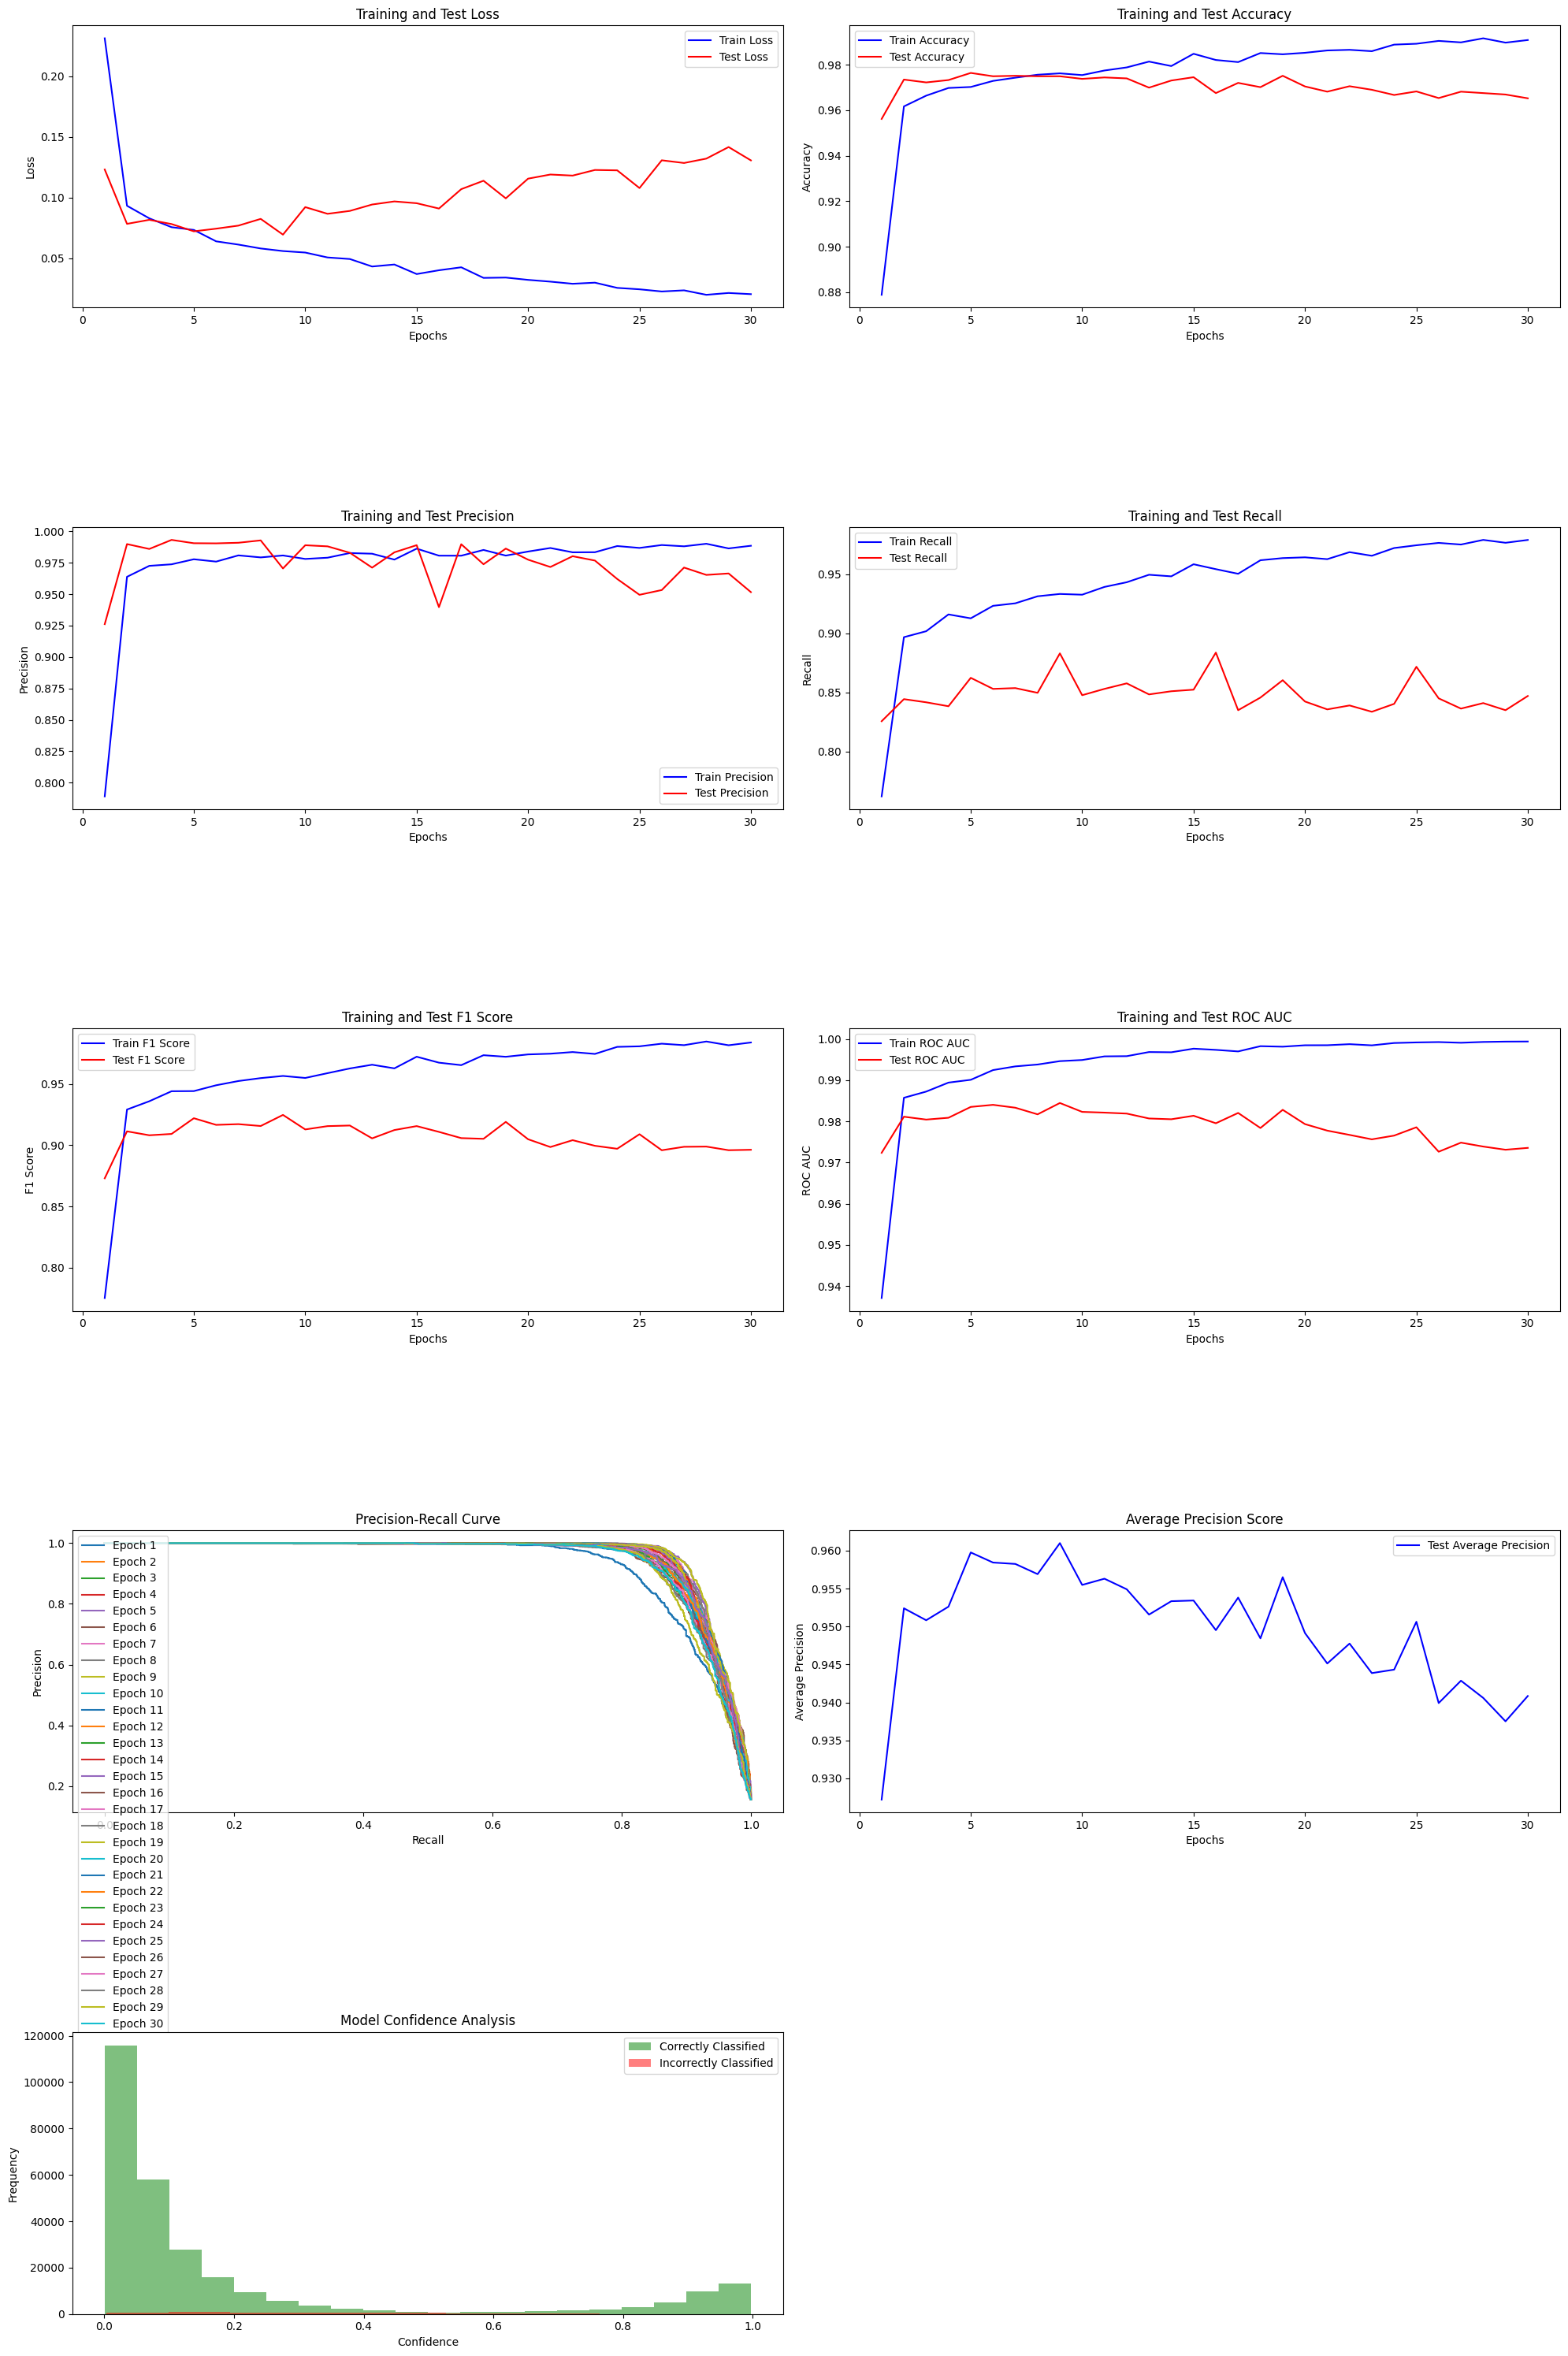

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_5.jpeg


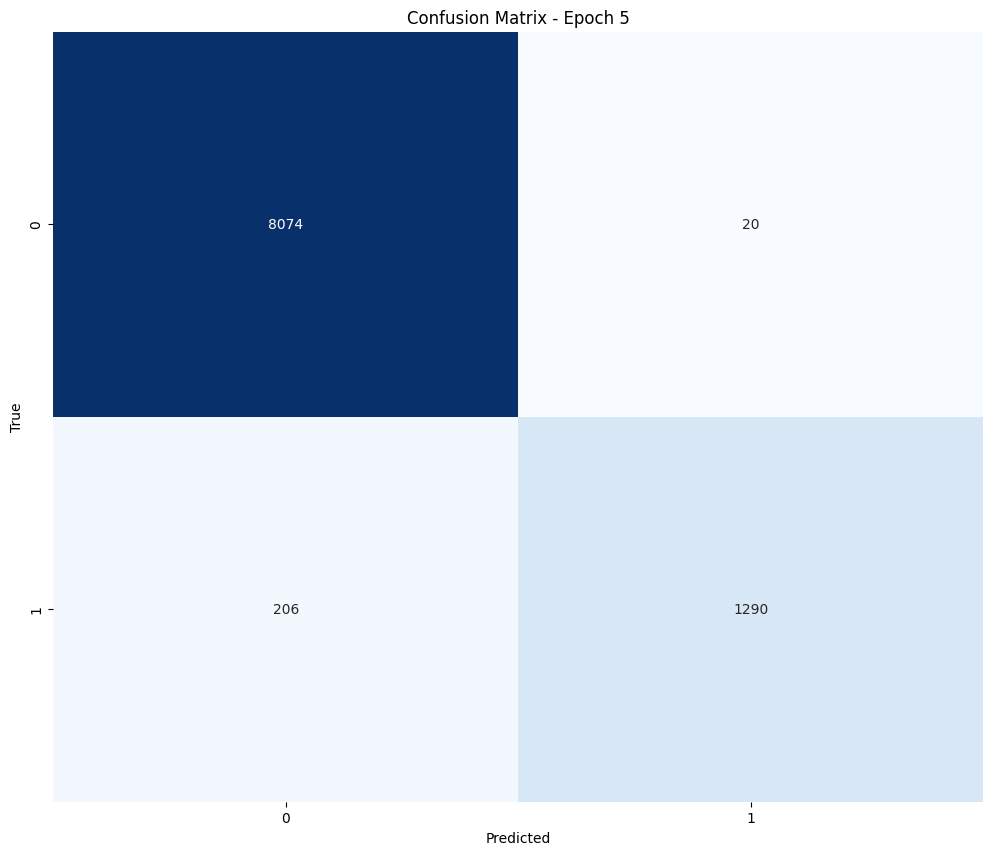

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_10.jpeg


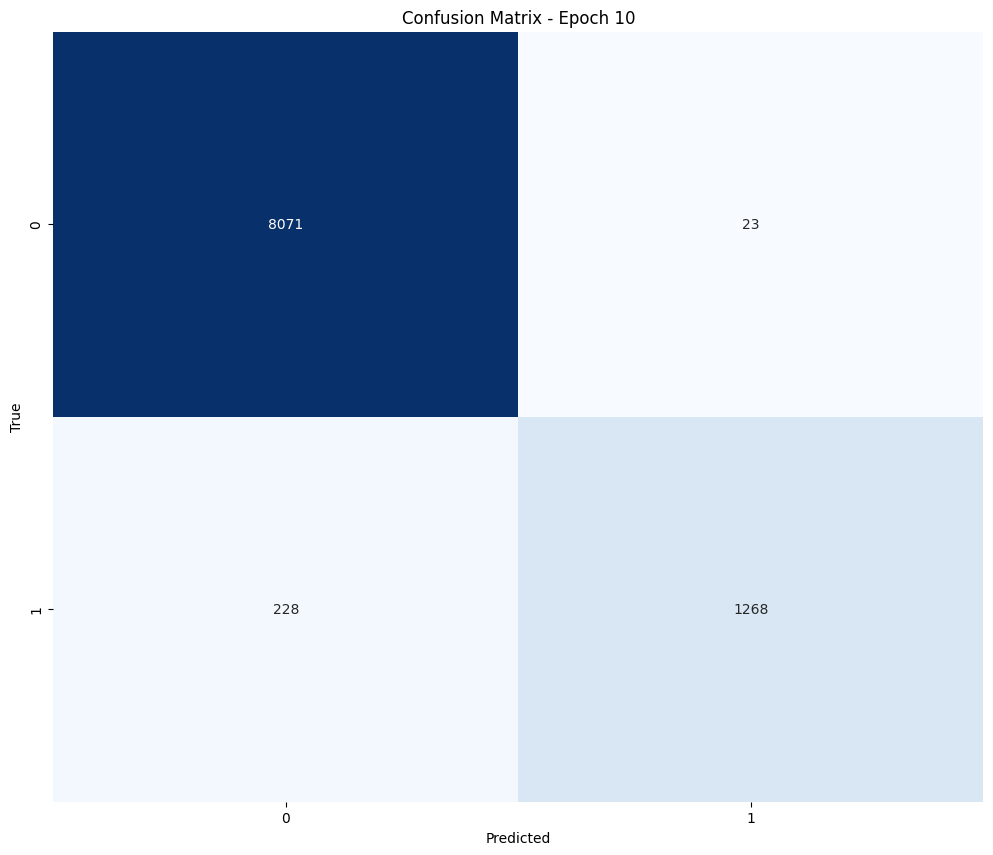

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_15.jpeg


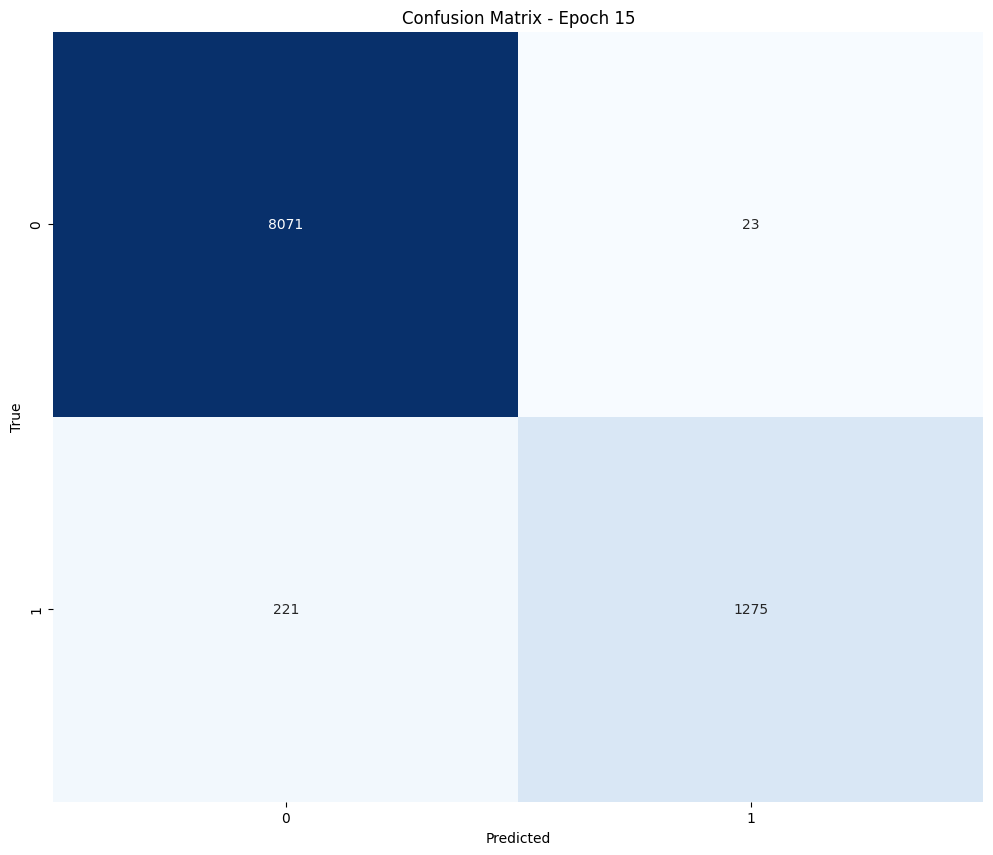

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_20.jpeg


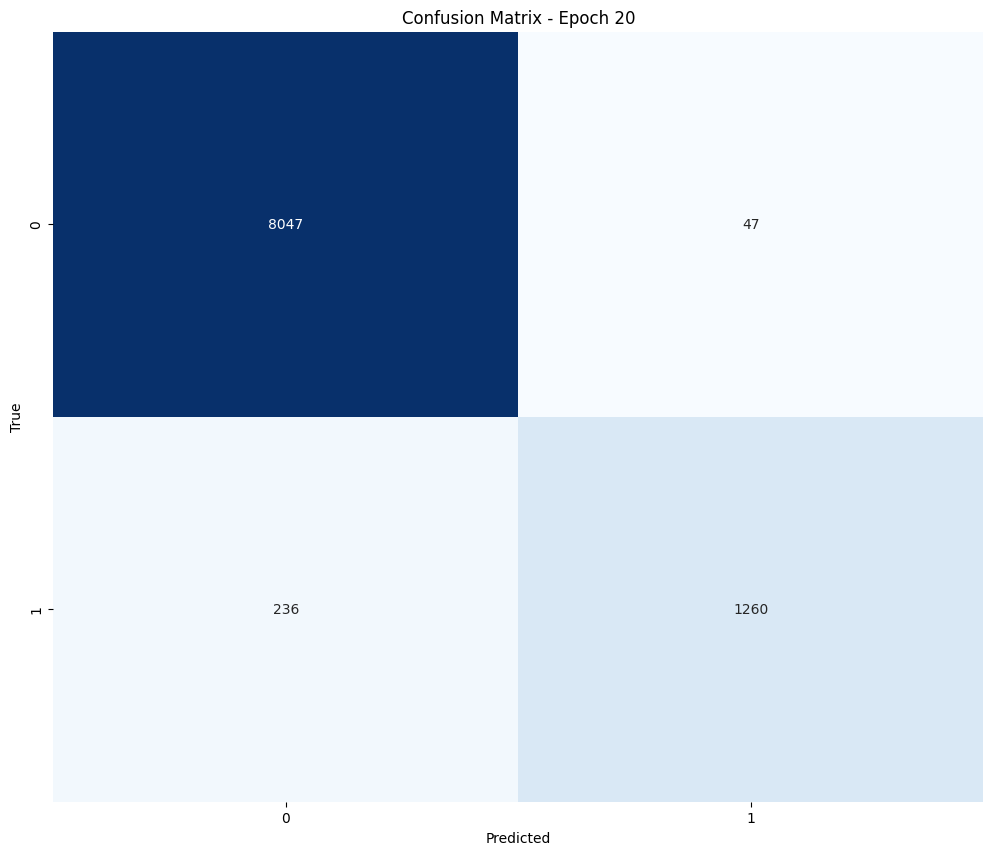

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_25.jpeg


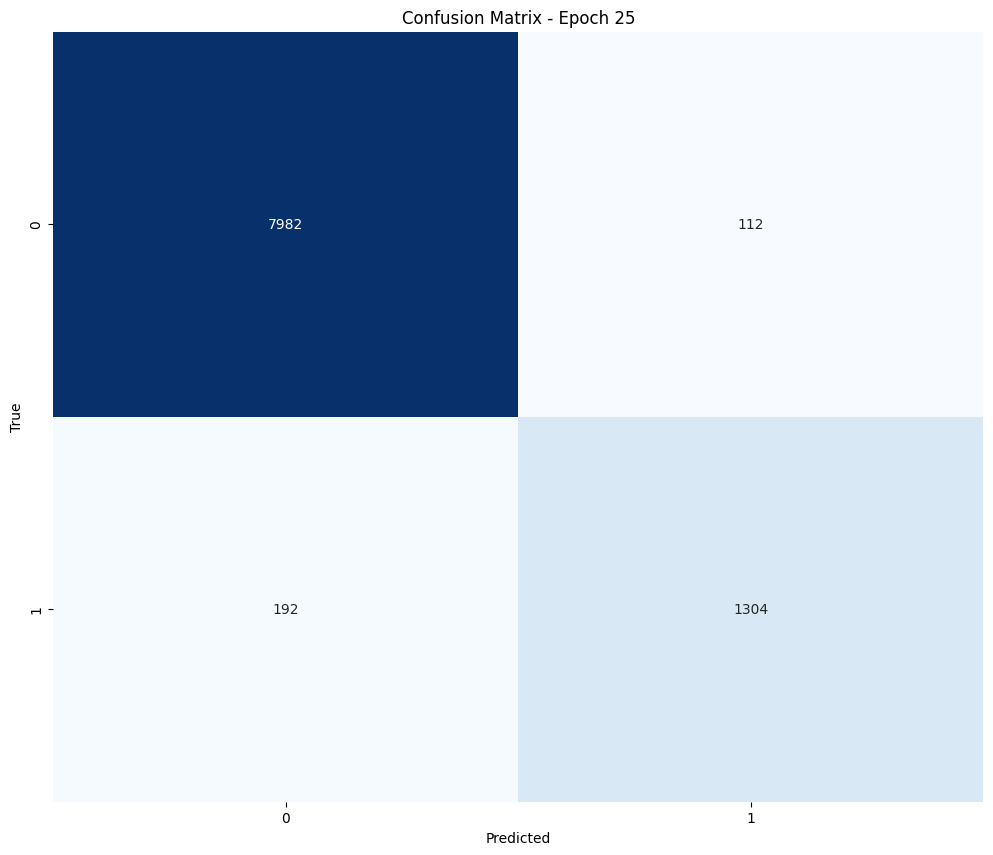

Confusion Matrix saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/confusion_matrix_epoch_30.jpeg


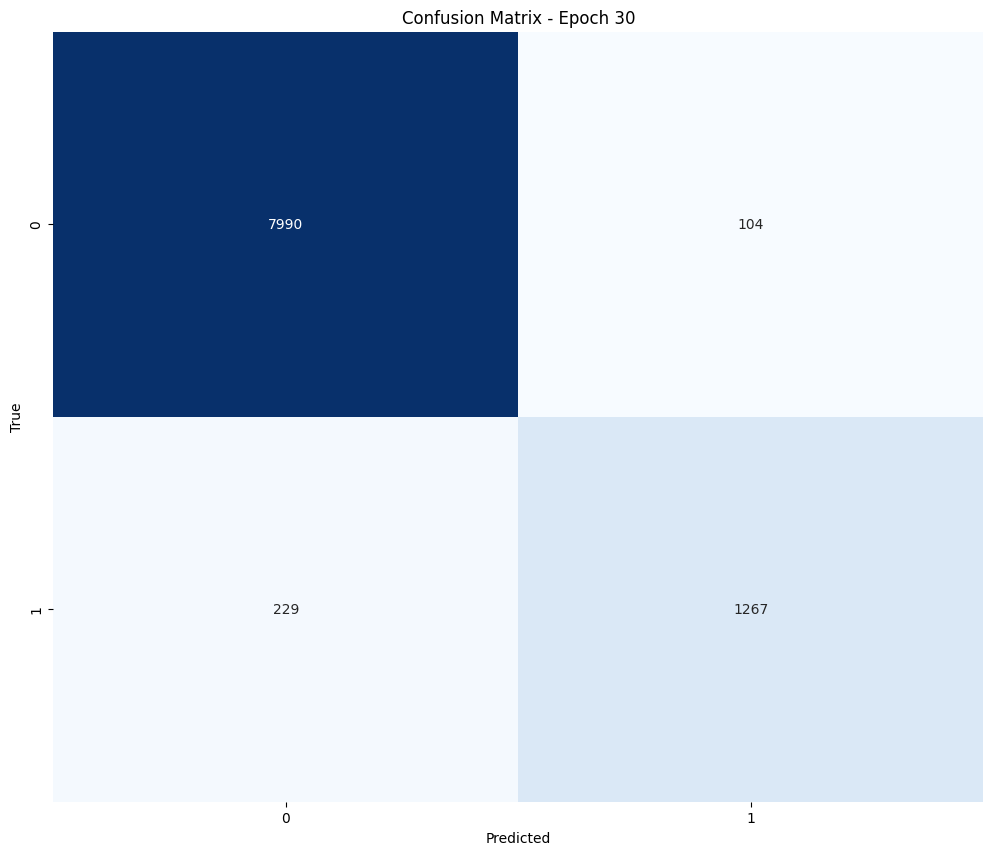

In [23]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Ensure you have tqdm imported

def plot_combined_metrics(H_pass1, H_pass2):
    # Combine metrics from Pass 1 and Pass 2
    combined_H = {}
    for key in H_pass1:
        combined_H[key] = H_pass1[key] + H_pass2[key]  # Concatenate metrics for Pass 1 and Pass 2
    
    # Number of epochs for combined training
    epochs = range(1, len(combined_H["train_loss"]) + 1)

    plt.figure(figsize=(20, 30))

    # Plot Training and Test Loss
    plt.subplot(5, 2, 1)
    plt.plot(epochs, combined_H["train_loss"], 'b', label='Train Loss')
    plt.plot(epochs, combined_H["test_loss"], 'r', label='Test Loss')
    plt.title('Training and Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training and Test Accuracy
    plt.subplot(5, 2, 2)
    plt.plot(epochs, combined_H["train_acc"], 'b', label='Train Accuracy')
    plt.plot(epochs, combined_H["test_acc"], 'r', label='Test Accuracy')
    plt.title('Training and Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Training and Test Precision
    plt.subplot(5, 2, 3)
    plt.plot(epochs, combined_H["train_precision"], 'b', label='Train Precision')
    plt.plot(epochs, combined_H["test_precision"], 'r', label='Test Precision')
    plt.title('Training and Test Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()

    # Plot Training and Test Recall
    plt.subplot(5, 2, 4)
    plt.plot(epochs, combined_H["train_recall"], 'b', label='Train Recall')
    plt.plot(epochs, combined_H["test_recall"], 'r', label='Test Recall')
    plt.title('Training and Test Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

    # Plot Training and Test F1 Score
    plt.subplot(5, 2, 5)
    plt.plot(epochs, combined_H["train_f1"], 'b', label='Train F1 Score')
    plt.plot(epochs, combined_H["test_f1"], 'r', label='Test F1 Score')
    plt.title('Training and Test F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()

    # Plot Training and Test ROC AUC
    plt.subplot(5, 2, 6)
    plt.plot(epochs, combined_H["train_roc_auc"], 'b', label='Train ROC AUC')
    plt.plot(epochs, combined_H["test_roc_auc"], 'r', label='Test ROC AUC')
    plt.title('Training and Test ROC AUC')
    plt.xlabel('Epochs')
    plt.ylabel('ROC AUC')
    plt.legend()

    # Plot Precision-Recall Curve for each epoch (from Pass 1 and Pass 2)
    plt.subplot(5, 2, 7)
    for i, (precision, recall) in enumerate(combined_H["test_precision_recall_curve"]):
        plt.plot(recall, precision, label=f'Epoch {i+1}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    # Plot Average Precision Score
    plt.subplot(5, 2, 8)
    plt.plot(epochs, combined_H["test_average_precision"], 'b', label='Test Average Precision')
    plt.title('Average Precision Score')
    plt.xlabel('Epochs')
    plt.ylabel('Average Precision')
    plt.legend()
    
    # Confidence Analysis Visualization
    plt.subplot(5, 2, 9)
    plt.hist(combined_H["correct_confidences"], bins=20, alpha=0.5, label='Correctly Classified', color='g')
    plt.hist(combined_H["incorrect_confidences"], bins=20, alpha=0.5, label='Incorrectly Classified', color='r')
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.title('Model Confidence Analysis')
    plt.legend()

    plt.tight_layout()

    # Save the plot with higher DPI for better quality
    plot_filename = os.path.join(PLOT_PATH, "model_metrics_plot.jpeg")
    plt.savefig(plot_filename, format='jpeg', dpi=300)
    print(f"Plot saved to {plot_filename}")

    # Display the plot in the notebook
    plt.show()  # Show the plot in the notebook

    plt.close()  # Ensure the plot is cleared after saving to avoid showing it blank

    # Plot Confusion Matrices every 5 epochs
    for i, cm in enumerate(combined_H["confusion_matrices"]):
        if (i + 1) % 5 == 0:  # Plot every 5 epochs
            plt.figure(figsize=(12, 10))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
            plt.title(f'Confusion Matrix - Epoch {i+1}')
            plt.xlabel('Predicted')
            plt.ylabel('True')

            # Save confusion matrix plots
            cm_filename = os.path.join(PLOT_PATH, f"confusion_matrix_epoch_{i+1}.jpeg")
            plt.savefig(cm_filename, format='jpeg', dpi=300)
            print(f"Confusion Matrix saved to {cm_filename}")

            plt.show()  # Show confusion matrix in the notebook
            plt.close()  # Close the plot to avoid memory issues

# Function call to plot the combined metrics
plot_combined_metrics(H_pass1, H_pass2)


# interactive visual comparison for predictions


In [26]:
import pandas as pd
import torch
import random
import matplotlib.pyplot as plt
from torchvision import transforms

# Load the test CSV to get metadata information (only used for loading purposes, not during visualization)
def load_metadata(csv_path):
    return pd.read_csv(csv_path)

# Define Function for Interactive Visual Comparison of 20 Random Images
def interactive_visual_comparison(model, test_loader, device):
    model.eval()
    all_images = []
    all_targets = []
    all_preds = []
    transform_back = transforms.ToPILImage()

    with torch.no_grad():
        for images, metadata, targets in test_loader:  # Removed 'image_names' from the DataLoader
            images, metadata = images.to(device), metadata.to(device)
            targets = targets.to(device)
            
            # Make predictions
            outputs = model(images, metadata)
            preds = torch.sigmoid(outputs).round()  # Convert logits to binary predictions (0 or 1)
            
            # Store images, targets, and predictions
            all_images.extend(images.cpu().detach())
            all_targets.extend(targets.cpu().detach().numpy())
            all_preds.extend(preds.cpu().detach().numpy())
    
    # Randomly select 20 samples
    indices = random.sample(range(len(all_images)), 20)
    
    plt.figure(figsize=(20, 40))
    for i, idx in enumerate(indices):
        original_label = "malignant" if all_targets[idx] == 1 else "benign"
        predicted_label = "malignant" if all_preds[idx] == 1 else "benign"

        # Convert image tensor back to PIL image
        img = transform_back(all_images[idx])
        
        # Plot the image and prediction details
        plt.subplot(10, 2, i + 1)  # Corrected the subplot number
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Original: {original_label}\nPredicted: {predicted_label}")
        
    plt.tight_layout()
    plt.show()



# lesion predictions


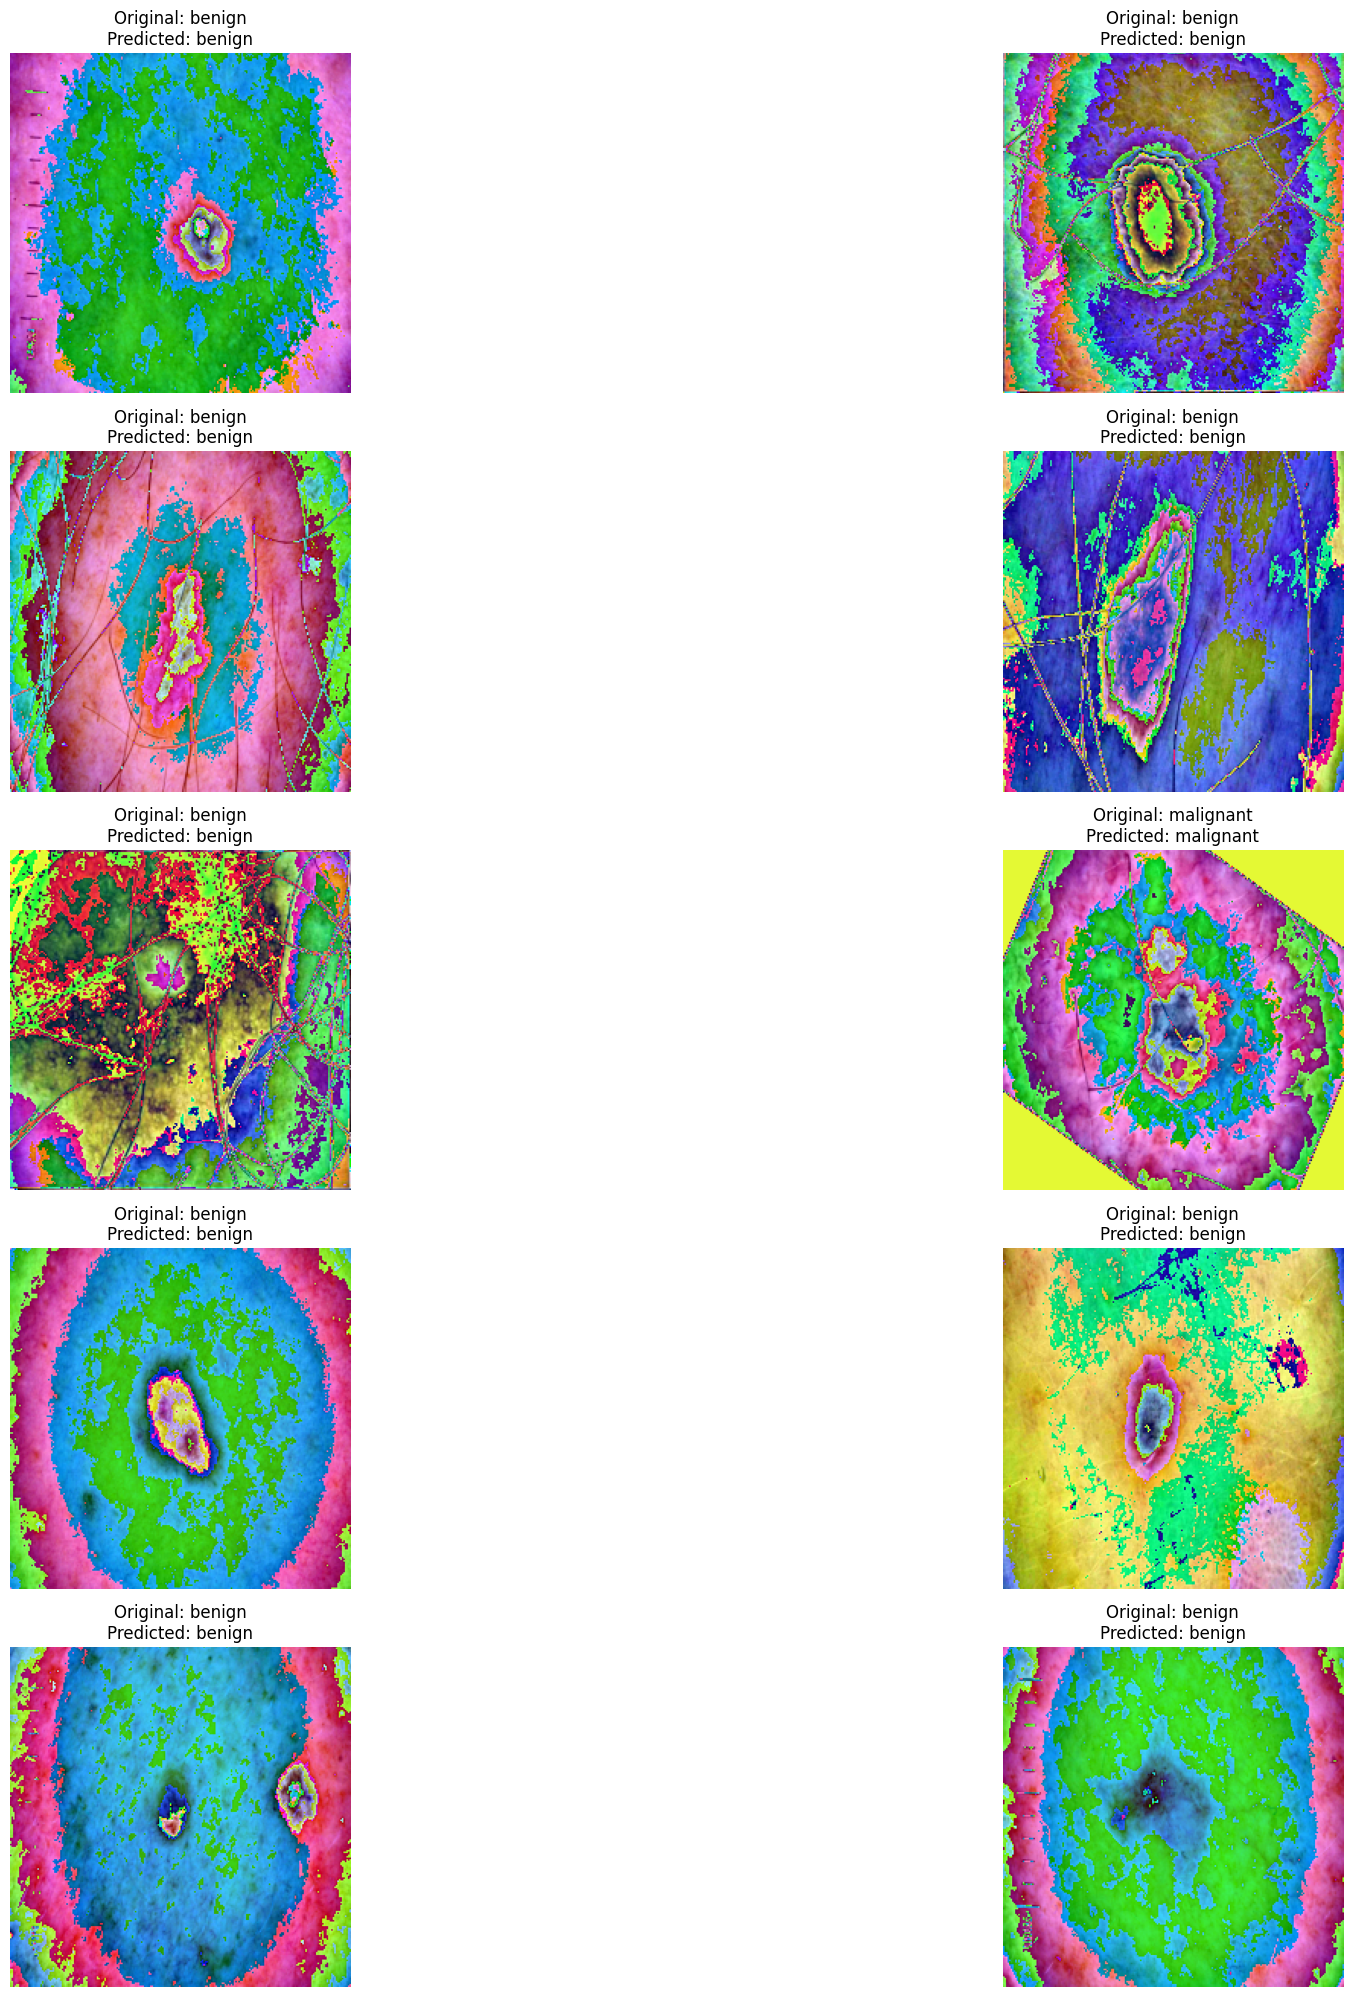

In [27]:
TEST_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'test_split.csv')
test_metadata_df = LesionPredictions.load_metadata(TEST_CSV_PATH)

# Make sure to define 'model', 'test_loader', and 'DEVICE'
visualizer = LesionPredictions(model, test_loader, DEVICE)
visualizer.inference_prediction()

# GUI based tool making predictions - Final Tool


In [1]:
import os
import time
import torch
import pandas as pd
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import torchvision.transforms as transforms
from tkinter import ttk
import torch.nn as nn
import torchvision.models as models

# Define the paths
BASE_DIR = "/Users/hafeez/Desktop"
IMAGE_DIR = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'Train_JPEG', 'JPEG')
TRAIN_CSV_PASS1 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass1.csv')
TRAIN_CSV_PASS2 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass2.csv')
TEST_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'test_split.csv')
MODEL_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'output', 'melanoma_trained_model.pth')

# Load the trained model
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def load_model(model_path):
    global model  # Declare model as global
    model = models.resnet50(pretrained=False)  # Load ResNet without pre-trained weights
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 1)  # Modify for binary classification
    model.load_state_dict(torch.load(model_path, map_location=DEVICE))
    model.eval()  # Set the model to evaluation mode
    return model

try:
    load_model(MODEL_PATH)
except RuntimeError as e:
    print(f"Error loading model: {e}")
    exit()

# Load CSV metadata
try:
    ground_truth_df_pass1 = pd.read_csv(TRAIN_CSV_PASS1)
    ground_truth_df_pass2 = pd.read_csv(TRAIN_CSV_PASS2)
    ground_truth_df_test = pd.read_csv(TEST_CSV_PATH)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Define the transform for input images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define function to predict the selected image with metadata
def predict_image(image_path):
    try:
        # Load and transform the image
        image = Image.open(image_path).convert('RGB')
        input_tensor = transform(image).unsqueeze(0).to(DEVICE)
        
        # Perform prediction
        with torch.no_grad():
            output = model(input_tensor).squeeze()
            probability = torch.sigmoid(output).item()
            prediction = 'malignant' if probability > 0.5 else 'benign'
            return prediction, probability
    except Exception as e:
        messagebox.showerror("Prediction Error", f"Error predicting image: {e}")
        return 'Error', 0.0

# Define function to get ground truth from CSV
def get_ground_truth(image_name):
    for df in [ground_truth_df_pass1, ground_truth_df_pass2, ground_truth_df_test]:
        ground_truth_row = df[df['image_name'] == image_name]
        if not ground_truth_row.empty:
            # Get the metadata
            sex = ground_truth_row.iloc[0]['sex']
            age = ground_truth_row.iloc[0]['age_approx']
            site = ground_truth_row.iloc[0]['anatom_site_general_challenge']
            return ground_truth_row.iloc[0]['benign_malignant'], sex, age, site
    return 'Unknown', None, None, None

# GUI for image selection and prediction
def select_image():
    # Ask user to select an image
    file_path = filedialog.askopenfilename(initialdir=IMAGE_DIR, title="Select an Image",
                                           filetypes=[("All files", "*.*")])  # Allow selection of files without extensions
    if file_path:
        try:
            # Display the selected image
            img = Image.open(file_path).convert('RGB')
            img.thumbnail((300, 300))
            img = ImageTk.PhotoImage(img)
            panel.configure(image=img)
            panel.image = img

            # Get the image name (without extension)
            image_name = os.path.basename(file_path)

            # Make prediction
            prediction, probability = predict_image(file_path)

            # Get ground truth
            ground_truth, sex, age, site = get_ground_truth(image_name)

            # Update the result label
            if prediction == 'Error' or ground_truth == 'Unknown':
                result_text = "An error occurred. Please try again."
            else:
                prediction_text = f"Prediction: {prediction.capitalize()} ({probability:.2f})"
                ground_truth_text = f"\nGround Truth: {ground_truth.capitalize()}"
                metadata_text = f"\nMetadata: Sex: {sex}, Age: {age}, Site: {site}"
                result_text = f"{prediction_text}\n{ground_truth_text}\n{metadata_text}"
            result_label.config(text=result_text, justify='center', font=('Helvetica', 18), foreground='#003366')
        except Exception as e:
            messagebox.showerror("Image Error", f"Error processing image: {e}")

# Set up the GUI
root = tk.Tk()
root.title("Skin Lesion Classification Tool")
root.geometry("800x900")
root.configure(bg='#e6f2ff')

# Style configuration
style = ttk.Style()
style.theme_use('clam')
style.configure('TButton', font=('Helvetica', 14), background='#007BFF', foreground='white', padding=10)
style.map('TButton', background=[('active', '#0056b3')])
style.configure('TLabel', font=('Helvetica', 16), background='#e6f2ff', foreground='#333333')

# Title label
title_label = ttk.Label(root, text="Skin Lesion Classification Tool", font=('Helvetica', 20, 'bold'), background='#e6f2ff')
title_label.pack(pady=20)

# Image display panel
panel = tk.Label(root, bg='#e6f2ff', borderwidth=2, relief="groove")
panel.pack(pady=20)

# Button to select image
btn = ttk.Button(root, text="Select Image", command=select_image)
btn.pack(pady=10)

# Label to display prediction and ground truth
result_label = ttk.Label(root, text="", wraplength=500)
result_label.pack(pady=20)

# Add university logo
try:
    logo_path = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'uds.jpg')
    logo_image = Image.open(logo_path).resize((220, 150), Image.LANCZOS)  # Use LANCZOS for resizing
    logo_photo = ImageTk.PhotoImage(logo_image)
    logo_label = tk.Label(root, image=logo_photo, bg='#e6f2ff')
    logo_label.image = logo_photo
    logo_label.pack(side='bottom', pady=20)
except FileNotFoundError:
    print("University logo not found. Skipping logo display.")

# Run the GUI
root.mainloop()


/Users/hafeez/opt/anaconda3/envs/env/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hafeez/opt/anaconda3/envs/env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Error loading model: Error(s) in loading state_dict for ResNet:
	Missing key(s) in state_dict: "conv1.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "layer1.0.conv1.weight", "layer1.0.bn1.weight", "layer1.0.bn1.bias", "layer1.0.bn1.running_mean", "layer1.0.bn1.running_var", "layer1.0.conv2.weight", "layer1.0.bn2.weight", "layer1.0.bn2.bias", "layer1.0.bn2.running_mean", "layer1.0.bn2.running_var", "layer1.0.conv3.weight", "layer1.0.bn3.weight", "layer1.0.bn3.bias", "layer1.0.bn3.running_mean", "layer1.0.bn3.running_var", "layer1.0.downsample.0.weight", "layer1.0.downsample.1.weight", "layer1.0.downsample.1.bias", "layer1.0.downsample.1.running_mean", "layer1.0.downsample.1.running_var", "layer1.1.conv1.weight", "layer1.1.bn1.weight", "layer1.1.bn1.bias", "layer1.1.bn1.running_mean", "layer1.1.bn1.running_var", "layer1.1.conv2.weight", "layer1.1.bn2.weight", "layer1.1.bn2.bias", "layer1.1.bn2.running_mean", "layer1.1.bn2.running_var", "layer1.1.conv3.weight", 

: 